In [1]:

import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from scipy.stats import randint
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, StackingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from scipy.stats import boxcox
from scipy.special import boxcox1p
from scipy.stats import skew
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from copy import deepcopy
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

train = pd.read_csv("train.csv")

test = pd.read_csv("test.csv")

train.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

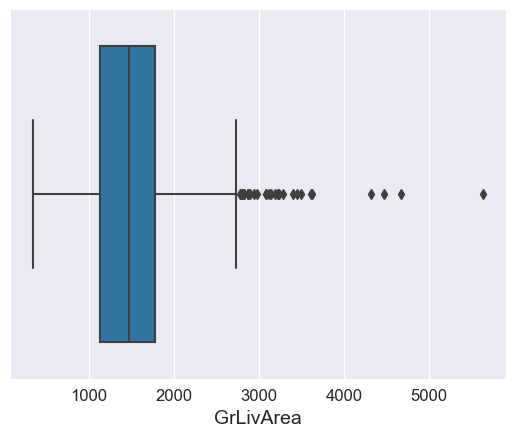

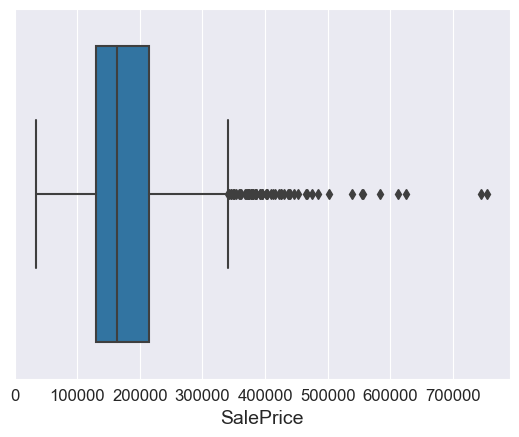

In [3]:
sns.boxplot(x=train['GrLivArea'])
plt.show()

sns.boxplot(x=train['SalePrice'])
plt.show()

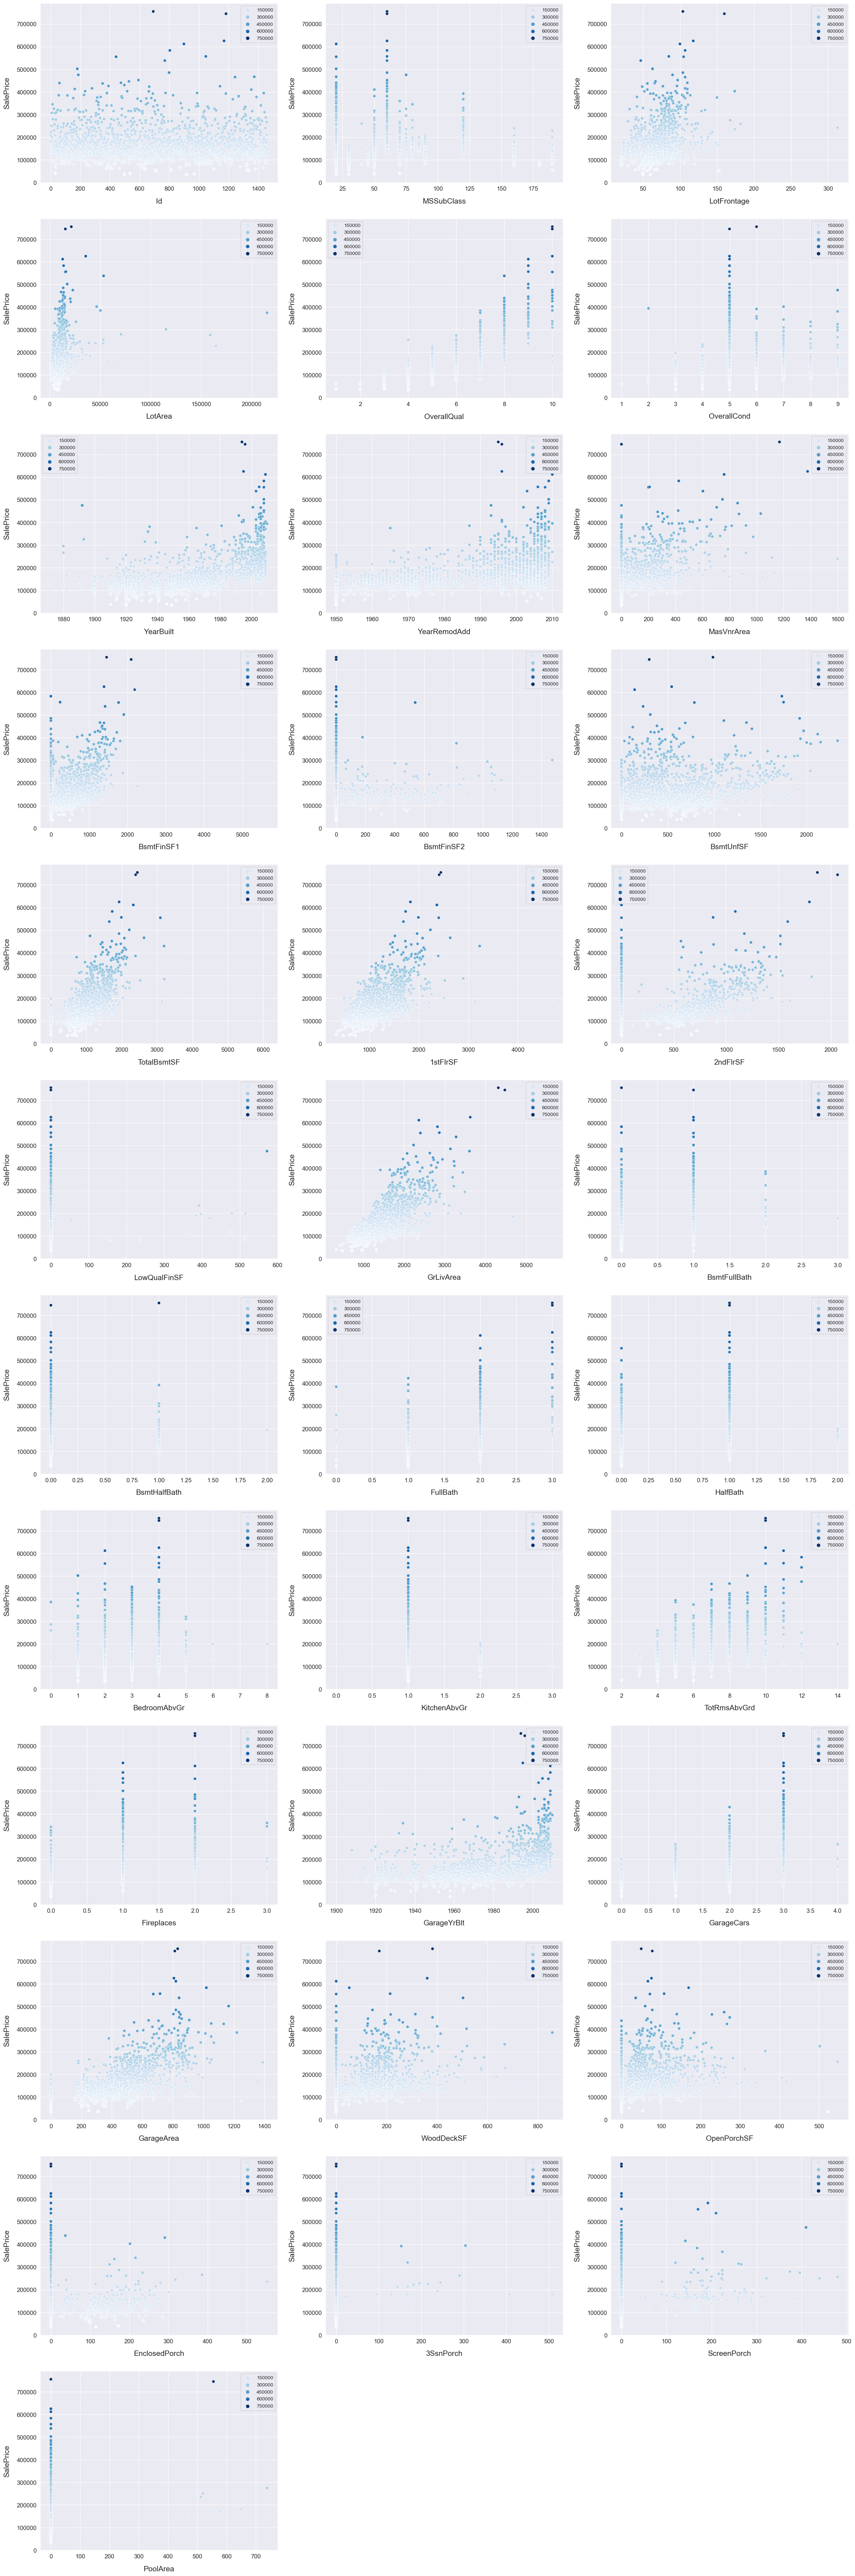

In [4]:
import seaborn as sns

colors = sns.color_palette()

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in train.columns:
    if train[i].dtype in numeric_dtypes:
        if i in ['TotalSF', 'Total_Bathrooms','Total_porch_sf','haspool','hasgarage','hasbsmt','hasfireplace']:
            pass
        else:
            numeric.append(i)     
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(train[numeric]), 1):
    if(feature=='MiscVal'):
        break
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Blues', data=train)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

In [5]:
def remove_outliers_iqr(df, column):
    if np.issubdtype(df[column].dtype, np.number):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    else:
        print(f"Column '{column}' is not numerical. Skipping outlier removal.")
    return df

train = remove_outliers_iqr(train, 'GrLivArea')
train = remove_outliers_iqr(train, 'YearBuilt')
train = remove_outliers_iqr(train, 'YearRemodAdd')
train = remove_outliers_iqr(train, 'GarageYrBlt')
train = remove_outliers_iqr(train, 'LotFrontage')
train = remove_outliers_iqr(train, 'KitchenQual')
train = remove_outliers_iqr(train, 'OverallQual')
train = remove_outliers_iqr(train, 'ExterQual')
train = remove_outliers_iqr(train, 'GarageArea')
train = remove_outliers_iqr(train, 'SalePrice')

Column 'KitchenQual' is not numerical. Skipping outlier removal.
Column 'ExterQual' is not numerical. Skipping outlier removal.



 mu = 170609.97 and sigma = 55939.04



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


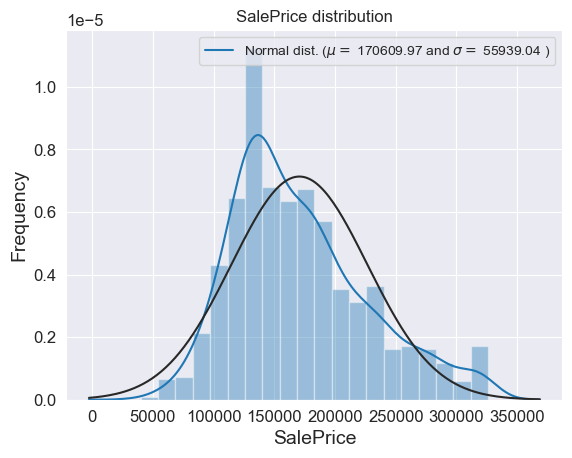

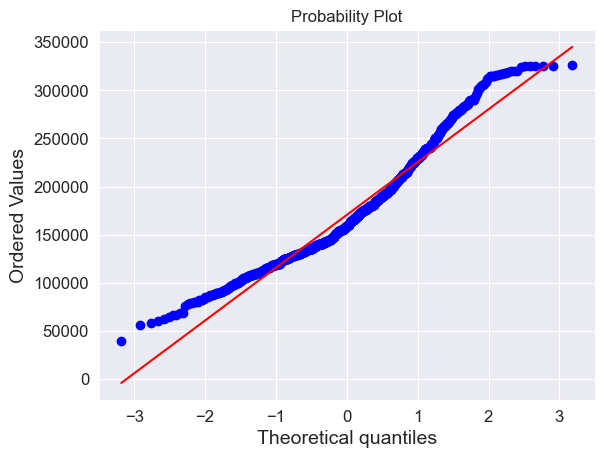

In [6]:

sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 11.99 and sigma = 0.33



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


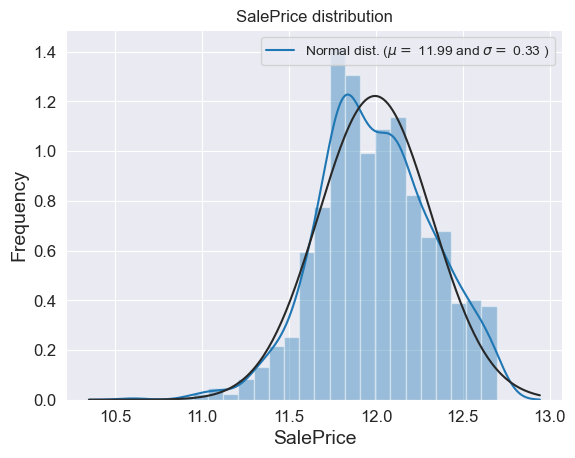

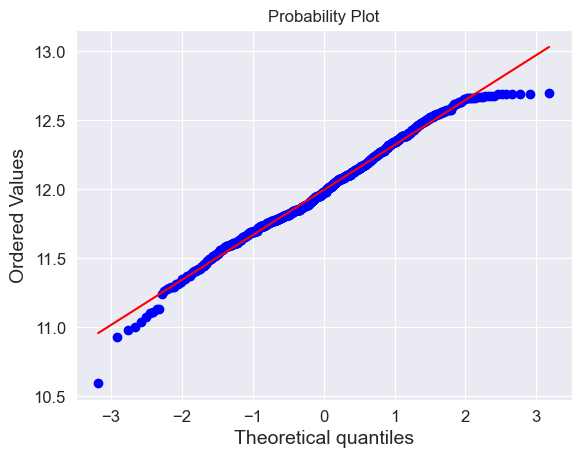

In [7]:
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [8]:

train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
train_data = pd.concat((train, test)).reset_index(drop=True)
train_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(train_data.shape))

all_data size is : (2404, 79)


# Feature enginnering / Data Cleaning & Manipulation

### Detecting Nans and solving them 

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2404 non-null   int64  
 1   MSZoning       2400 non-null   object 
 2   LotFrontage    2177 non-null   float64
 3   LotArea        2404 non-null   int64  
 4   Street         2404 non-null   object 
 5   Alley          169 non-null    object 
 6   LotShape       2404 non-null   object 
 7   LandContour    2404 non-null   object 
 8   Utilities      2402 non-null   object 
 9   LotConfig      2404 non-null   object 
 10  LandSlope      2404 non-null   object 
 11  Neighborhood   2404 non-null   object 
 12  Condition1     2404 non-null   object 
 13  Condition2     2404 non-null   object 
 14  BldgType       2404 non-null   object 
 15  HouseStyle     2404 non-null   object 
 16  OverallQual    2404 non-null   int64  
 17  OverallCond    2404 non-null   int64  
 18  YearBuil

In [10]:
train_data.isna().sum()

MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            2235
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         21
MasVnrArea         20
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           68
BsmtCond           69
BsmtExposure       69
BsmtFinType1       66
BsmtFinSF1          1
BsmtFinType2       67
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [11]:
train_data['TotalBsmtSF'].fillna(0,inplace=True)
train_data['BsmtFinSF1'].fillna(0,inplace=True)
train_data['BsmtFinSF2'].fillna(0,inplace=True)
train_data['BsmtUnfSF'].fillna(0,inplace=True)
train_data.drop('Utilities',axis=1,inplace=True)
train_data['Functional'].fillna('Unknown',inplace=True)
train_data['BsmtFullBath'].fillna(0,inplace=True)
train_data['BsmtHalfBath'].fillna(0,inplace=True)
train_data['SaleType'].fillna('Unknown',inplace=True)
train_data['MSZoning'].fillna('Unknown',inplace=True)
train_data['FireplaceQu'].fillna('Non-Existant',inplace = True)
train_data['GarageArea'].fillna(0,inplace=True)
train_data['Electrical'].fillna('SBrkr' ,inplace=True)
train_data['MasVnrType'].fillna('Unknown',inplace=True)
train_data['MasVnrArea'].fillna(0 ,inplace=True)
train_data['GarageCars'].fillna(0 ,inplace=True)
train_data['KitchenQual'].fillna('Unknown' ,inplace=True)

In [12]:
train_data['GarageType'].fillna(train_data['GarageType'].mode()[0],inplace=True)
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mode()[0],inplace=True)
train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0],inplace=True)
train_data['GarageQual'].fillna(train_data['GarageQual'].mode()[0],inplace=True)
train_data['GarageCond'].fillna(train_data['GarageCond'].mode()[0],inplace=True)

In [13]:

def EMF(x):
    bins = [0, 1, 320, 480, 576, 1418]
    labels = ['None', '1Q', '2Q', '3Q', '4Q']
    if np.isscalar(x):
        binned = pd.cut(np.array([x]), bins, labels=labels, include_lowest=True)
        return binned[0]
    else:
        binned = pd.cut(x, bins, labels=labels, include_lowest=True)
        return binned

mode_values3 = train_data.groupby(train_data['GarageArea'].apply(EMF))['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else 'None')
mode_values3.reset_index(inplace=True)

mode_values3

C:\Users\Omar Muhammed\AppData\Local\Temp\ipykernel_5024\2965498878.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mode_values3 = train_data.groupby(train_data['GarageArea'].apply(EMF))['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else 'None')


GarageArea GarageType  GarageYrBlt GarageFinish GarageQual GarageCond
0         1Q     Detchd       1950.0          Unf         TA         TA
1         2Q     Attchd       2005.0          Unf         TA         TA
2         3Q     Attchd       2005.0          Unf         TA         TA
3         4Q     Attchd       2007.0          RFn         TA         TA
4       None     Attchd       2005.0          Unf         TA         TA

In [14]:
def fill_nan3(x, mode_value, column_guide, column_nan):
    

    for index , row in x.iterrows():
        
        if row[column_nan] == x[column_nan].mode()[0] :
            
            emf = EMF(row[column_guide])
            
            if emf in mode_value[column_guide].values:
                
                train_data.loc[index,column_nan] = mode_value.loc[mode_value[column_guide] == emf , column_nan].values[0]
            

fill_nan3(train_data,mode_values3,'GarageArea','GarageType') 
fill_nan3(train_data,mode_values3,'GarageArea','GarageYrBlt')
fill_nan3(train_data,mode_values3,'GarageArea','GarageFinish')
fill_nan3(train_data,mode_values3,'GarageArea','GarageQual')
fill_nan3(train_data,mode_values3,'GarageArea','GarageCond')

In [15]:
train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0] ,inplace=True)
train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode()[0],inplace=True)
train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mode()[0] ,inplace=True)
train_data['BsmtFinType1'].fillna(train_data['BsmtFinType1'].mode()[0] ,inplace=True)
train_data['BsmtFinType2'].fillna(train_data['BsmtFinType2'].mode()[0] ,inplace=True)

In [16]:

def discretize_total_bsmt_sf(x):
    bins = [0 , 1 , 790, 990, 1300, 6000]
    labels = ['None', '1Q', '2Q', '3Q', '4Q']
    if np.isscalar(x):
        binned = pd.cut(np.array([x]), bins, labels=labels, include_lowest=True)
        return binned[0]
    else:
        binned = pd.cut(x, bins, labels=labels, include_lowest=True)
        return binned

mode_values = train_data.groupby(train_data['TotalBsmtSF'].apply(discretize_total_bsmt_sf))['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else 'Non_existant')
mode_values.reset_index(inplace=True)


fill_nan3(train_data, mode_values, 'TotalBsmtSF', 'BsmtQual')
fill_nan3(train_data, mode_values, 'TotalBsmtSF', 'BsmtCond')
fill_nan3(train_data, mode_values, 'TotalBsmtSF', 'BsmtExposure')
fill_nan3(train_data, mode_values, 'TotalBsmtSF', 'BsmtFinType1')
fill_nan3(train_data, mode_values, 'TotalBsmtSF', 'BsmtFinType2')


C:\Users\Omar Muhammed\AppData\Local\Temp\ipykernel_5024\2654742448.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mode_values = train_data.groupby(train_data['TotalBsmtSF'].apply(discretize_total_bsmt_sf))['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else 'Non_existant')


In [17]:
train_data['LotFrontage'].fillna(train_data['LotFrontage'].median() ,inplace=True)
train_data['Alley'].fillna(train_data['Alley'].mode()[0],inplace=True)
train_data['MiscFeature'].fillna(train_data['MiscFeature'].mode()[0] ,inplace=True)
train_data['Fence'].fillna(train_data['Fence'].mode()[0] ,inplace=True)

In [18]:
mode_values1 = pd.DataFrame(train_data.groupby(train_data['Neighborhood'])['LotFrontage'].agg(lambda x: x.median() if not x.mode().empty else 'Unknown'))
mode_values1['Alley'] = train_data.groupby(train_data['Neighborhood'])['Alley'].agg(lambda x: x.mode() if not x.mode().empty else 'Unknown')
mode_values1['MiscFeature'] =  train_data.groupby('Neighborhood')['MiscFeature'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else 'Unknown')
mode_values1['Fence'] = train_data.groupby('Neighborhood')['Fence'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else 'Unknown')
mode_values1.reset_index(inplace=True) 
mode_values1

Neighborhood  LotFrontage Alley MiscFeature  Fence
0       Blmngtn         51.0  Grvl        Shed  MnPrv
1       Blueste         24.0  Grvl        Shed  MnPrv
2        BrDale         21.0  Grvl        Shed  MnPrv
3       BrkSide         52.0  Grvl        Shed  MnPrv
4       ClearCr         75.0  Grvl        Shed  MnPrv
5       CollgCr         68.0  Grvl        Shed  MnPrv
6       Crawfor         68.0  Grvl        Shed  MnPrv
7       Edwards         65.0  Grvl        Shed  MnPrv
8       Gilbert         65.0  Grvl        Shed  MnPrv
9        IDOTRR         60.0  Grvl        Shed  MnPrv
10      MeadowV         21.0  Grvl        Shed  MnPrv
11      Mitchel         70.0  Grvl        Shed  MnPrv
12        NAmes         71.0  Grvl        Shed  MnPrv
13      NPkVill         24.0  Grvl        Shed  MnPrv
14       NWAmes         80.0  Grvl        Shed  MnPrv
15      NoRidge         84.0  Grvl        Shed  MnPrv
16      NridgHt         85.0  Grvl        Shed  MnPrv
17      OldTown         60.0  Grvl        Shed  MnPrv
18        SWISU         60.0  Grvl        Shed  MnPrv
19       Sawyer         70.0  Grvl        Shed  MnPrv
20      SawyerW         68.0  Grvl        Shed  MnPrv
21      Somerst         72.0  Grvl        Shed  MnPrv
22      StoneBr         58.0  Grvl        Shed  MnPrv
23       Timber         79.0  Grvl        Shed  MnPrv
24      Veenker         80.0  Grvl        Shed  MnPrv

In [19]:
mode_values1 = pd.DataFrame(train_data.groupby(train_data['Neighborhood'])['LotFrontage'].agg(lambda x: x.median() if not x.mode().empty else 'Unknown'))
mode_values1.reset_index(inplace=True) 
mode_values1
def fill_Nans2(df, mode_value , column_guide, column_nans):
    
    
    for index, row in df.iterrows():
        
        
        if row[column_nans] == df[column_guide].mode()[0] and row[column_guide] in mode_value[column_guide].values:
            
            df.loc[index, column_nans] = mode_value.loc[mode_value[column_guide] == row[column_guide], column_nans].values[0]
            
        elif pd.isna(row[column_nans]) and row[column_guide] in mode_value[column_guide].values :
            
            df.loc[index, column_nans] = mode_value.loc[mode_value[column_guide] == row[column_guide], column_nans].values[0]

fill_Nans2(train_data, mode_values1,  'Neighborhood', 'LotFrontage')


In [20]:
def fill_Nans2(df, mode_value , column_guide, column_nans):
    
    
    for index, row in df.iterrows():
        
        
        if row[column_nans] == df[column_guide].mode()[0] and row[column_guide] in mode_value[column_guide].values:
            
            df.loc[index, column_nans] = mode_value.loc[mode_value[column_guide] == row[column_guide], column_nans].values[0]
            
        elif pd.isna(row[column_nans]) and row[column_guide] in mode_value[column_guide].values :
            
            df.loc[index, column_nans] = mode_value.loc[mode_value[column_guide] == row[column_guide], column_nans].values[0]

fill_Nans2(train_data, mode_values1,  'Neighborhood', 'LotFrontage')
fill_Nans2(train_data, mode_values1, 'Neighborhood', 'Alley')
fill_Nans2(train_data, mode_values1, 'Neighborhood','Fence')
fill_Nans2(train_data, mode_values1, 'Neighborhood', 'MiscFeature')

In [21]:
def pool_area_range(pool_area):
    if pool_area == 0:
        return 'No Pool'
    elif pool_area <= 300:
        return 'Small'
    elif pool_area <= 600:
        return 'Medium'
    else:
        return 'Large'
                
mode_values2 = train_data.groupby(train_data['PoolArea'].apply(pool_area_range))['PoolQC'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else 'NoPool')

mode_values2

PoolArea
Large          Fa
Medium         Gd
No Pool    NoPool
Small          Ex
Name: PoolQC, dtype: object

In [22]:
def fill_poolqc(df, mode_values):
    for index, row in df.iterrows():
        if pd.isna(row['PoolQC']):
            pool_area_category = pool_area_range(row['PoolArea'])
            if pool_area_category in mode_values:
                df.at[index, 'PoolQC'] = mode_values[pool_area_category]
                
fill_poolqc(train_data,mode_values2)                

In [23]:
modi = train_data.groupby(train_data['ExterQual'])['Exterior1st','Exterior2nd'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else 'Non_existant')
modi.reset_index(inplace=True)
fill_Nans2(train_data,modi,'ExterQual','Exterior1st')
fill_Nans2(train_data,modi,'ExterQual','Exterior2nd')

C:\Users\Omar Muhammed\AppData\Local\Temp\ipykernel_5024\2406559139.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  modi = train_data.groupby(train_data['ExterQual'])['Exterior1st','Exterior2nd'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else 'Non_existant')


In [24]:
import pandas as pd

# Assuming train_data is your DataFrame
data_types = train_data.applymap(type)

mixed_columns = []

for column in data_types.columns:
    unique_types = data_types[column].nunique()
    if unique_types > 1:
        mixed_columns.append(column)

print("Columns with mixed data types:", mixed_columns)

Columns with mixed data types: []


In [25]:
train_data['MSSubClass'] = train_data['MSSubClass'].apply(str)
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].astype(str)
train_data['YrSold'] = train_data['YrSold'].astype(str)
train_data['MoSold'] = train_data['MoSold'].astype(str)

In [26]:

from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train_data[c].values)) 
    train_data[c] = lbl.transform(list(train_data[c].values))
    
    
print('Shape all_data: {}'.format(train_data.shape))

Shape all_data: (2404, 78)


## Feature engineering and data manpulation 

In [27]:
train_data['TotalSF'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']


In [28]:
train_dfx = train_data

In [29]:
train_n = train_dfx.select_dtypes(include=[np.number])
train_n.head(10)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          10         65.0     8450            7            4       2003   
1           5         80.0     9600            6            7       1976   
2          10         68.0    11250            7            4       2001   
3          11         60.0     9550            7            4       1915   
4          10         84.0    14260            8            4       2000   
5           9         85.0    14115            5            4       1993   
6           5         75.0    10084            8            4       2004   
7           9         51.0     6120            7            4       1931   
8           4         50.0     7420            5            5       1939   
9           5         70.0    11200            5            4       1965   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0          2003       196.0          2          4         2         3   
1          1976         0.0          3          4         2         3   
2          2002       162.0          2          4         2         3   
3          1970         0.0          3          4         2         1   
4          2000       350.0          2          4         2         3   
5          1995         0.0          3          4         2         3   
6          2005       186.0          2          4         0         3   
7          1950         0.0          3          4         2         3   
8          1950         0.0          3          4         2         3   
9          1965         0.0          3          4         2         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             2       706.0             5         0.0   
1             1             0       978.0             5         0.0   
2             2             2       486.0             5         0.0   
3             3             0       216.0             5         0.0   
4             0             2       655.0             5         0.0   
5             3             2       732.0             5         0.0   
6             0             2      1369.0             5         0.0   
7             3             2         0.0             5         0.0   
8             3             2       851.0             5         0.0   
9             3             4       906.0             5         0.0   

   BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0      150.0        856.0          0       856       854             0   
1      284.0       1262.0          0      1262         0             0   
2      434.0        920.0          0       920       866             0   
3      540.0        756.0          2       961       756             0   
4      490.0       1145.0          0      1145      1053             0   
5       64.0        796.0          0       796       566             0   
6      317.0       1686.0          0      1694         0             0   
7      952.0        952.0          2      1022       752             0   
8      140.0        991.0          0      1077         0             0   
9      134.0       1040.0          0      1040         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   
5       1362           1.0           0.0         1         1             1   
6       1694           1.0           0.0         2         0             3   
7       1774           0.0           0.0         2         0             2   
8       1077           1.0           0.0         1         0   

the k.No  2
the k.No  2


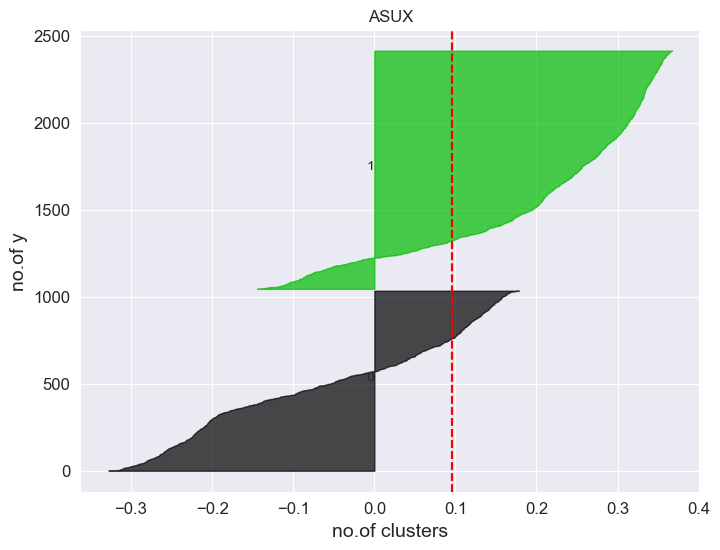

the k.No  3
the k.No  3
the k.No  3


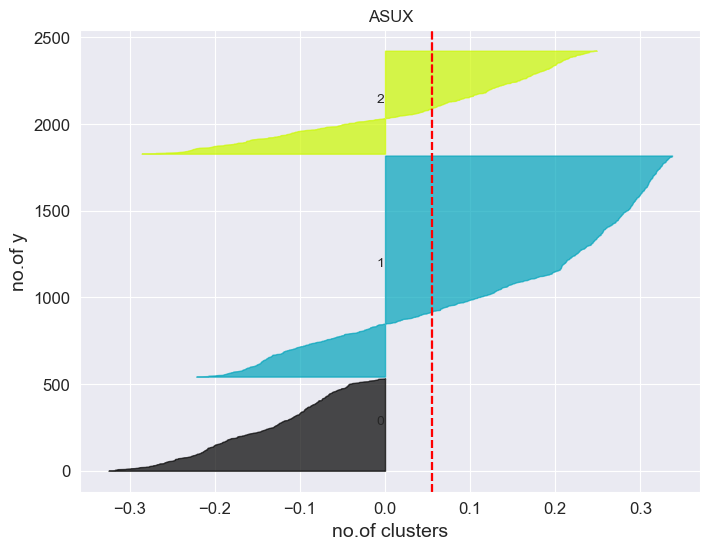

the k.No  4
the k.No  4
the k.No  4
the k.No  4


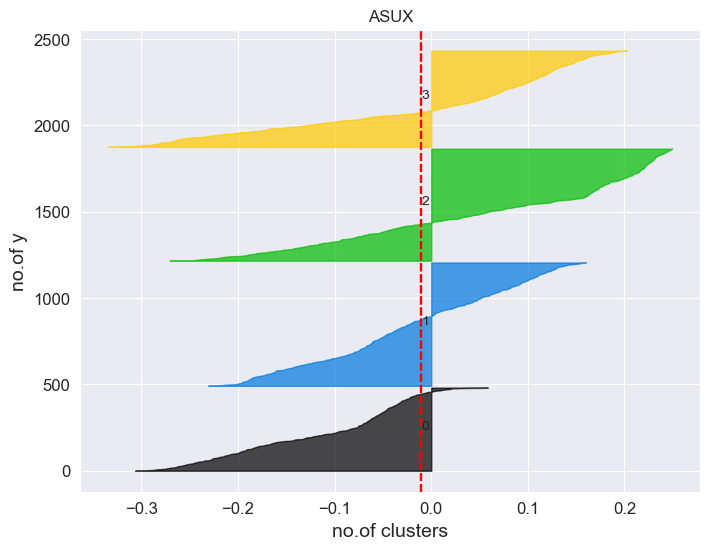

the k.No  5
the k.No  5
the k.No  5
the k.No  5
the k.No  5


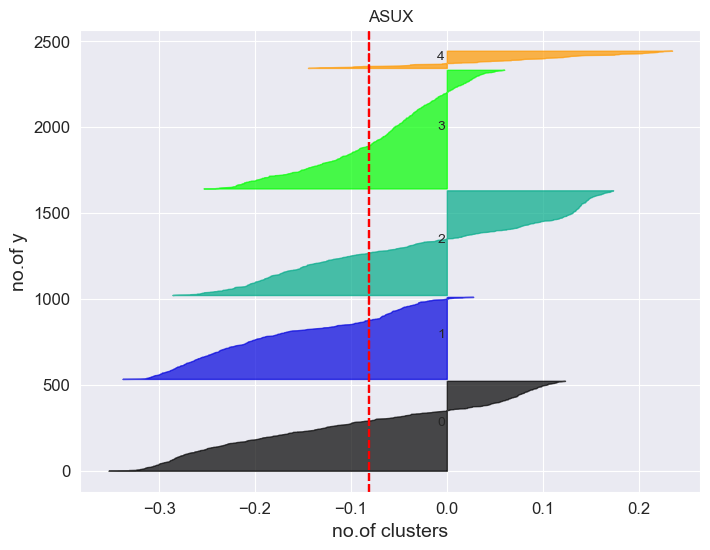

the k.No  6
the k.No  6
the k.No  6
the k.No  6
the k.No  6
the k.No  6


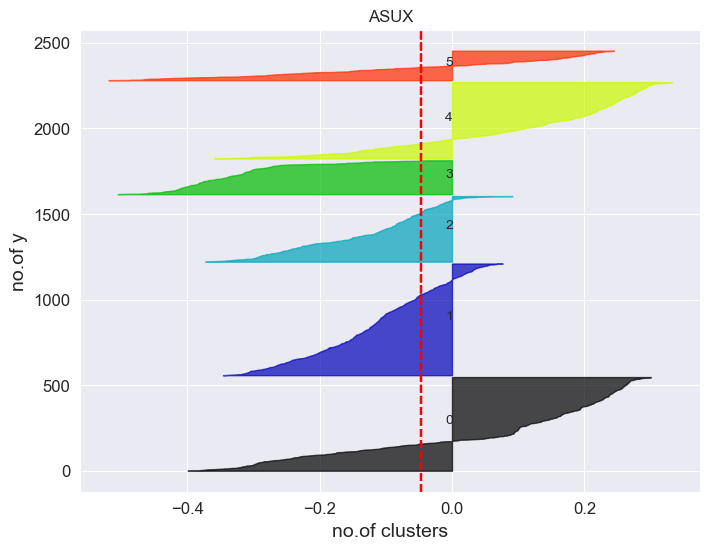

the k.No  7
the k.No  7
the k.No  7
the k.No  7
the k.No  7
the k.No  7
the k.No  7


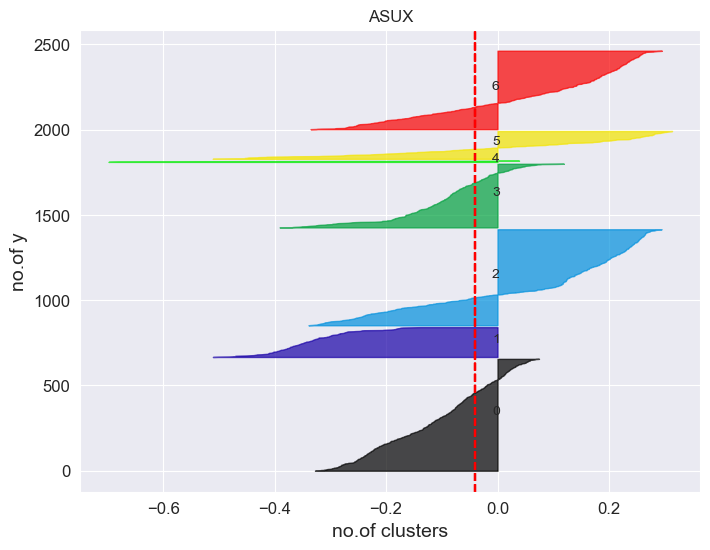

the k.No  8
the k.No  8
the k.No  8
the k.No  8
the k.No  8
the k.No  8
the k.No  8
the k.No  8


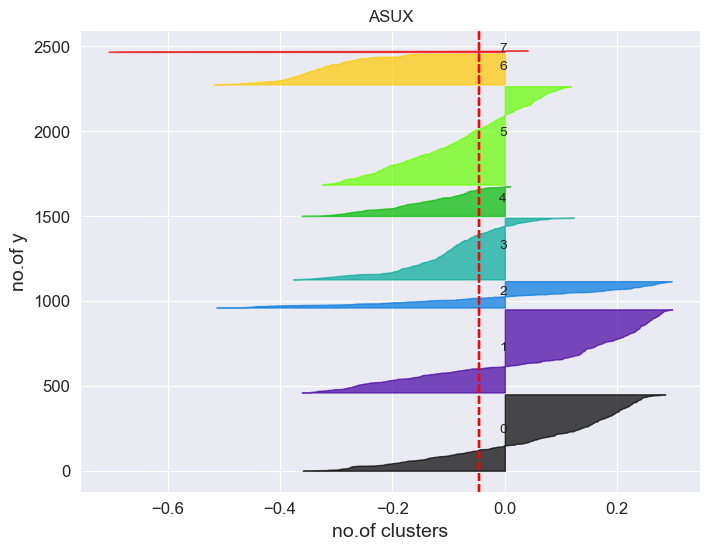

the k.No  9
the k.No  9
the k.No  9
the k.No  9
the k.No  9
the k.No  9
the k.No  9
the k.No  9
the k.No  9


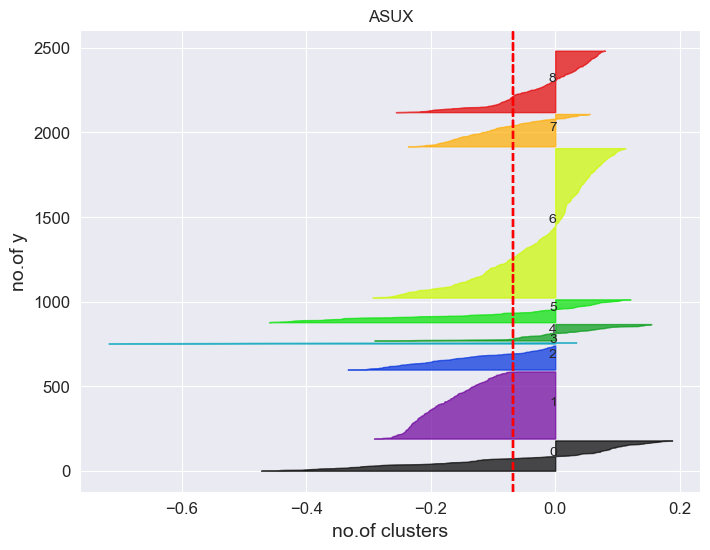

the k.No  10
the k.No  10
the k.No  10
the k.No  10
the k.No  10
the k.No  10
the k.No  10
the k.No  10
the k.No  10
the k.No  10


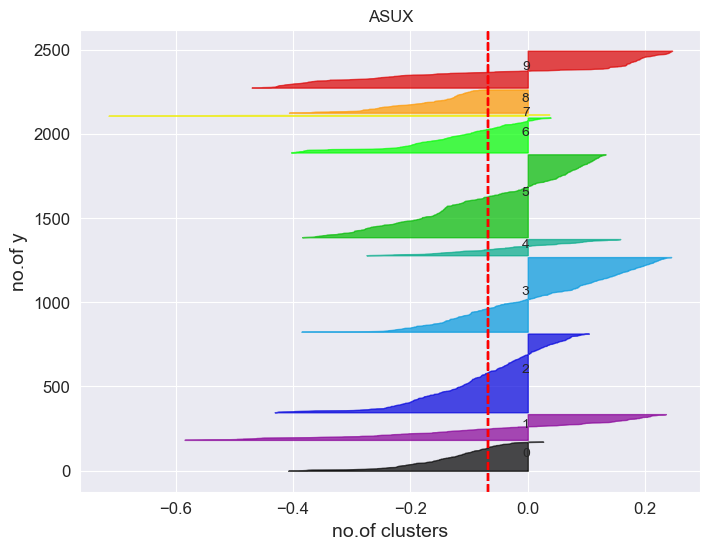

the k.No  11
the k.No  11
the k.No  11
the k.No  11
the k.No  11
the k.No  11
the k.No  11
the k.No  11
the k.No  11
the k.No  11
the k.No  11


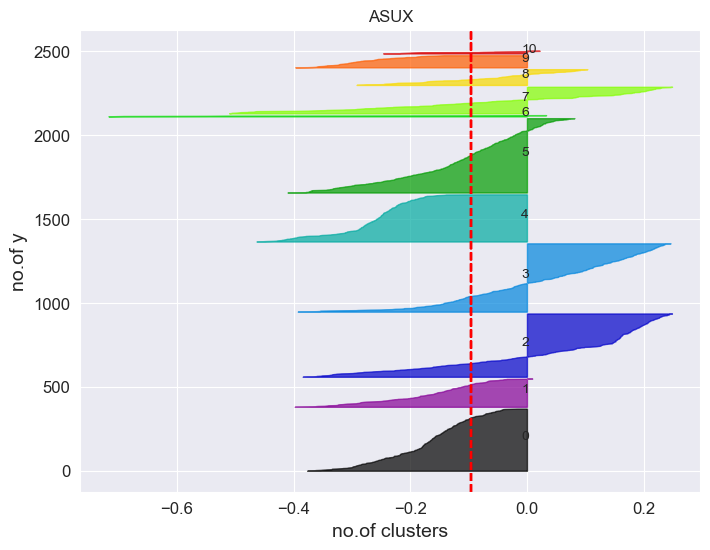

the k.No  12
the k.No  12
the k.No  12
the k.No  12
the k.No  12
the k.No  12
the k.No  12
the k.No  12
the k.No  12
the k.No  12
the k.No  12
the k.No  12


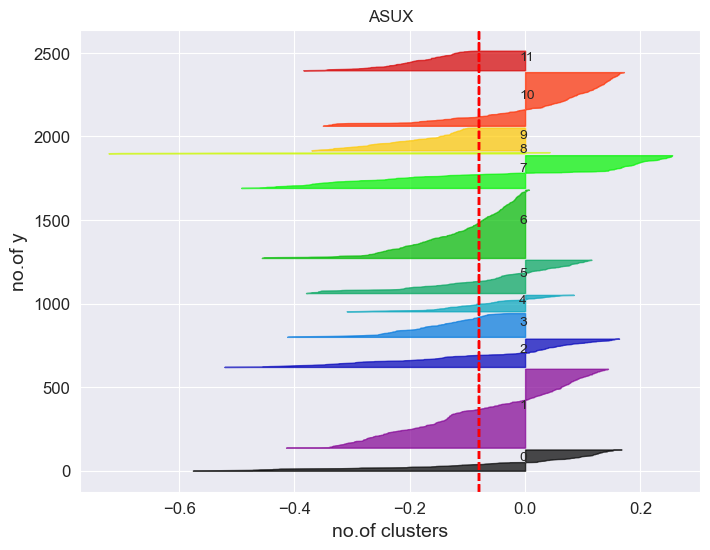

the k.No  13
the k.No  13
the k.No  13
the k.No  13
the k.No  13
the k.No  13
the k.No  13
the k.No  13
the k.No  13
the k.No  13
the k.No  13
the k.No  13
the k.No  13


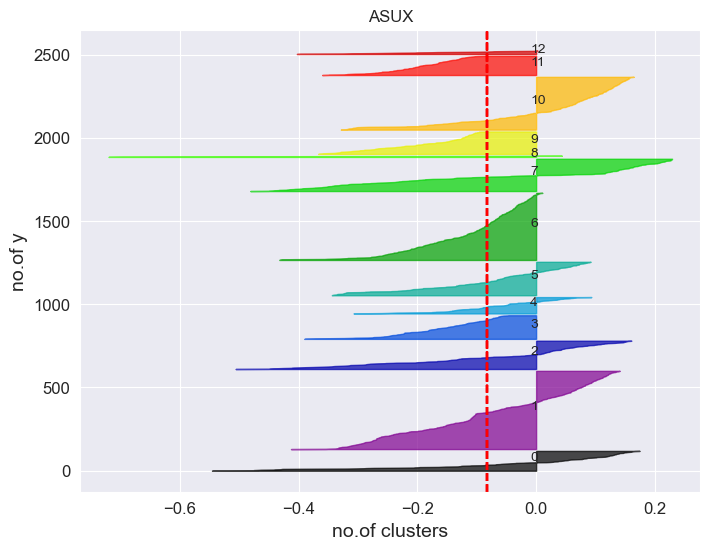

the k.No  14
the k.No  14
the k.No  14
the k.No  14
the k.No  14
the k.No  14
the k.No  14
the k.No  14
the k.No  14
the k.No  14
the k.No  14
the k.No  14
the k.No  14
the k.No  14


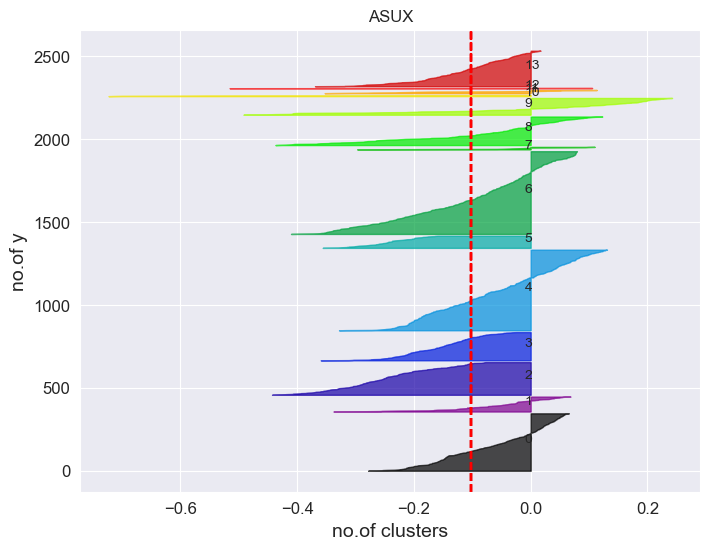

the k.No  15
the k.No  15
the k.No  15
the k.No  15
the k.No  15
the k.No  15
the k.No  15
the k.No  15
the k.No  15
the k.No  15
the k.No  15
the k.No  15
the k.No  15
the k.No  15
the k.No  15


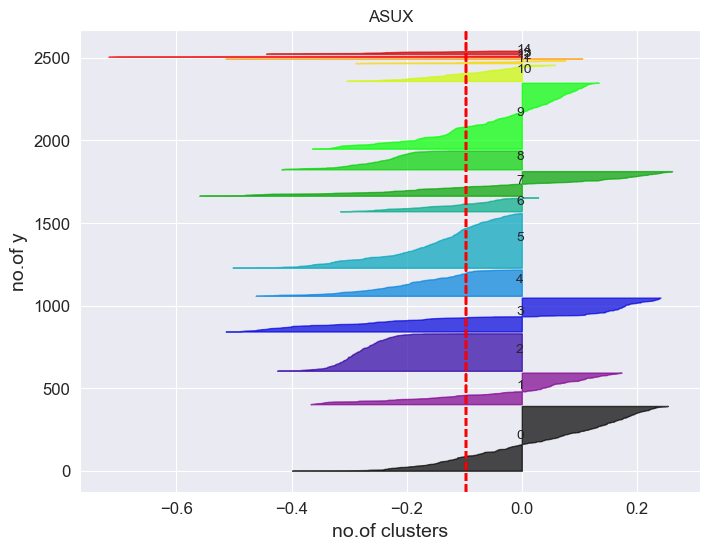

the k.No  16
the k.No  16
the k.No  16
the k.No  16
the k.No  16
the k.No  16
the k.No  16
the k.No  16
the k.No  16
the k.No  16
the k.No  16
the k.No  16
the k.No  16
the k.No  16
the k.No  16
the k.No  16


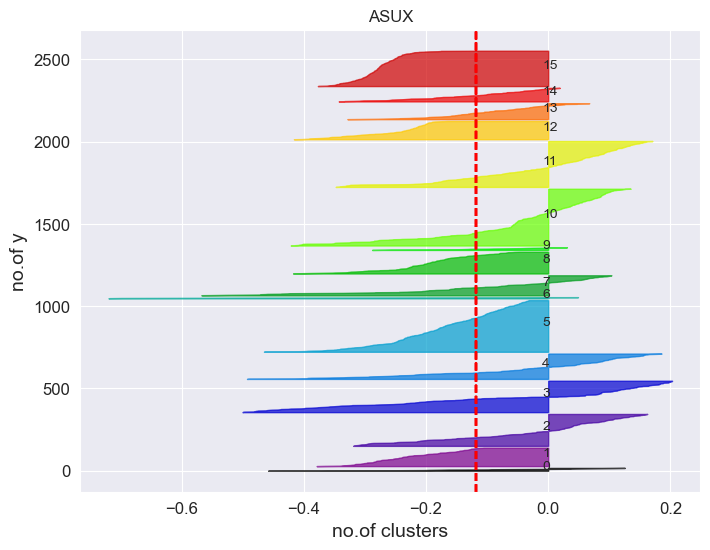

the k.No  17
the k.No  17
the k.No  17
the k.No  17
the k.No  17
the k.No  17
the k.No  17
the k.No  17
the k.No  17
the k.No  17
the k.No  17
the k.No  17
the k.No  17
the k.No  17
the k.No  17
the k.No  17
the k.No  17


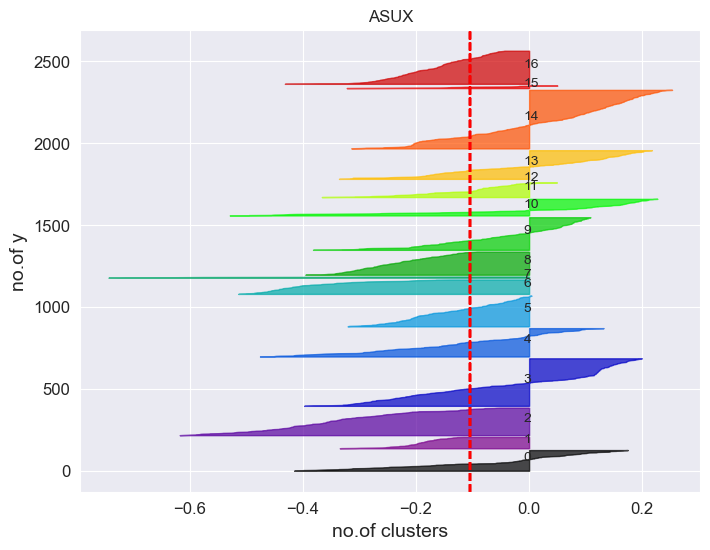

the k.No  18
the k.No  18
the k.No  18
the k.No  18
the k.No  18
the k.No  18
the k.No  18
the k.No  18
the k.No  18
the k.No  18
the k.No  18
the k.No  18
the k.No  18
the k.No  18
the k.No  18
the k.No  18
the k.No  18
the k.No  18


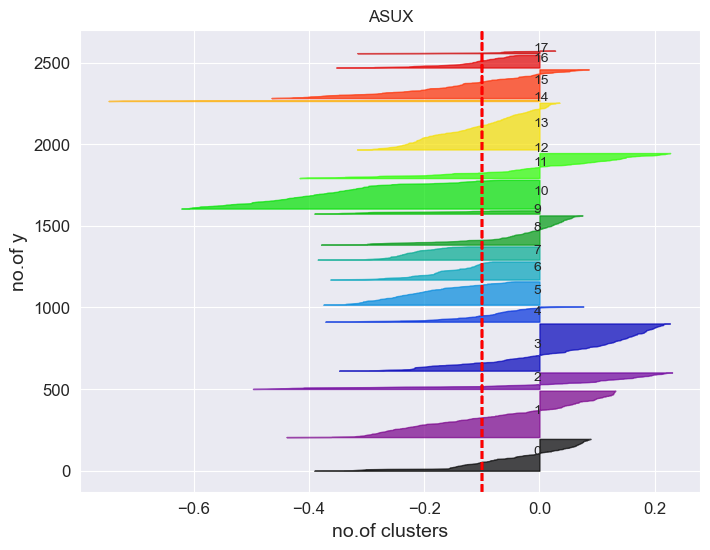

the k.No  19
the k.No  19
the k.No  19
the k.No  19
the k.No  19
the k.No  19
the k.No  19
the k.No  19
the k.No  19
the k.No  19
the k.No  19
the k.No  19
the k.No  19
the k.No  19
the k.No  19
the k.No  19
the k.No  19
the k.No  19
the k.No  19


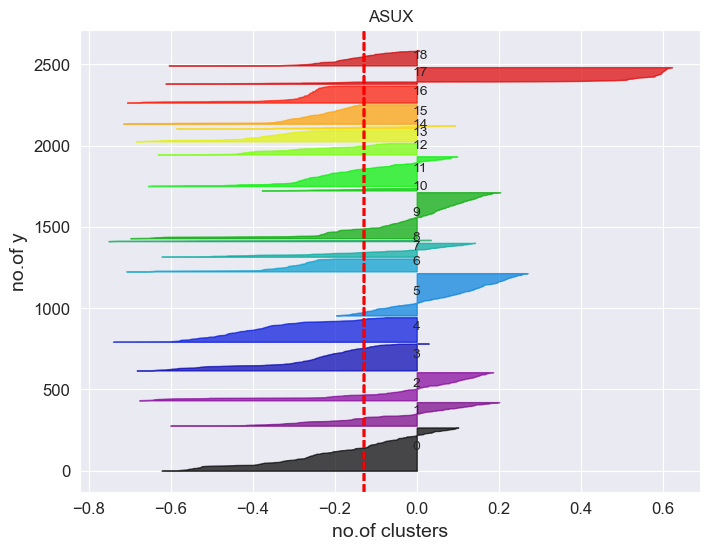

the k.No  20
the k.No  20
the k.No  20
the k.No  20
the k.No  20
the k.No  20
the k.No  20
the k.No  20
the k.No  20
the k.No  20
the k.No  20
the k.No  20
the k.No  20
the k.No  20
the k.No  20
the k.No  20
the k.No  20
the k.No  20
the k.No  20
the k.No  20


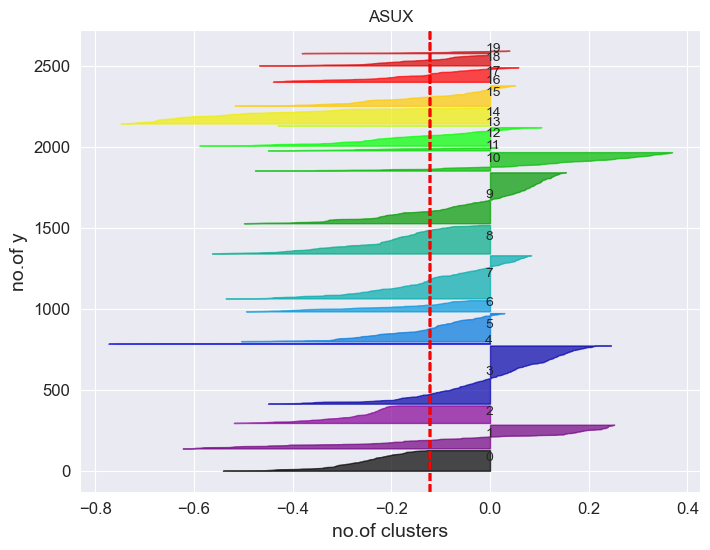

the k.No  21
the k.No  21
the k.No  21
the k.No  21
the k.No  21
the k.No  21
the k.No  21
the k.No  21
the k.No  21
the k.No  21
the k.No  21
the k.No  21
the k.No  21
the k.No  21
the k.No  21
the k.No  21
the k.No  21
the k.No  21
the k.No  21
the k.No  21
the k.No  21


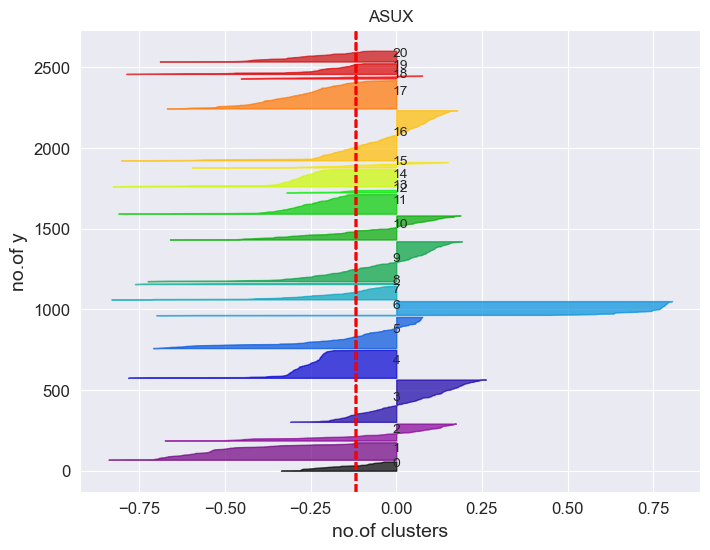

the k.No  22
the k.No  22
the k.No  22
the k.No  22
the k.No  22
the k.No  22
the k.No  22
the k.No  22
the k.No  22
the k.No  22
the k.No  22
the k.No  22
the k.No  22
the k.No  22
the k.No  22
the k.No  22
the k.No  22
the k.No  22
the k.No  22
the k.No  22
the k.No  22
the k.No  22


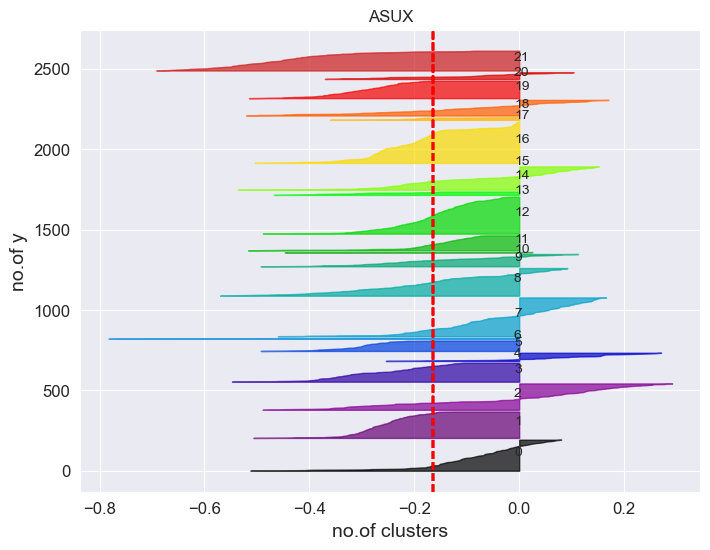

the k.No  23
the k.No  23
the k.No  23
the k.No  23
the k.No  23
the k.No  23
the k.No  23
the k.No  23
the k.No  23
the k.No  23
the k.No  23
the k.No  23
the k.No  23
the k.No  23
the k.No  23
the k.No  23
the k.No  23
the k.No  23
the k.No  23
the k.No  23
the k.No  23
the k.No  23
the k.No  23


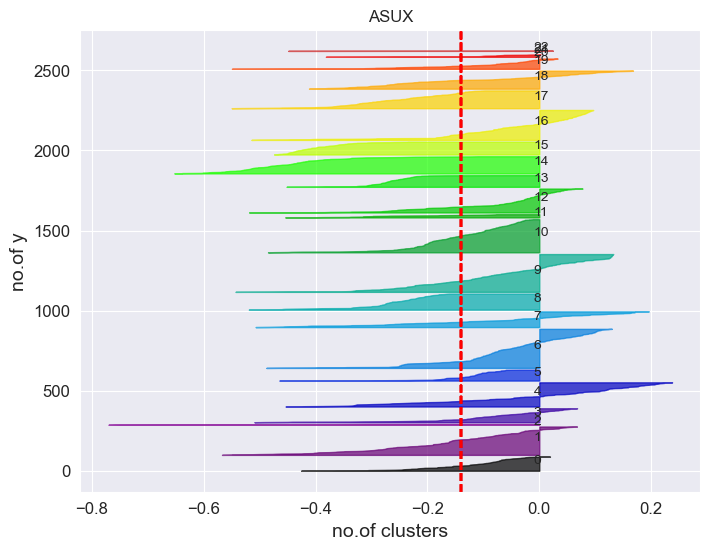

the k.No  24
the k.No  24
the k.No  24
the k.No  24
the k.No  24
the k.No  24
the k.No  24
the k.No  24
the k.No  24
the k.No  24
the k.No  24
the k.No  24
the k.No  24
the k.No  24
the k.No  24
the k.No  24
the k.No  24
the k.No  24
the k.No  24
the k.No  24
the k.No  24
the k.No  24
the k.No  24
the k.No  24


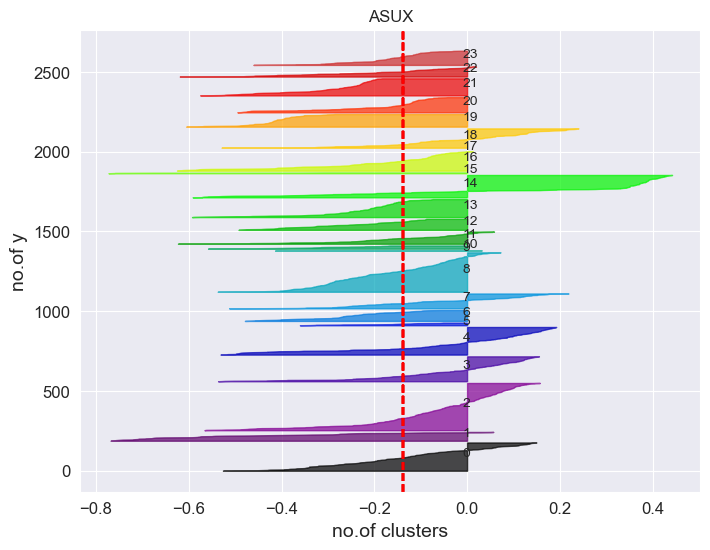

the k.No  25
the k.No  25
the k.No  25
the k.No  25
the k.No  25
the k.No  25
the k.No  25
the k.No  25
the k.No  25
the k.No  25
the k.No  25
the k.No  25
the k.No  25
the k.No  25
the k.No  25
the k.No  25
the k.No  25
the k.No  25
the k.No  25
the k.No  25
the k.No  25
the k.No  25
the k.No  25
the k.No  25
the k.No  25


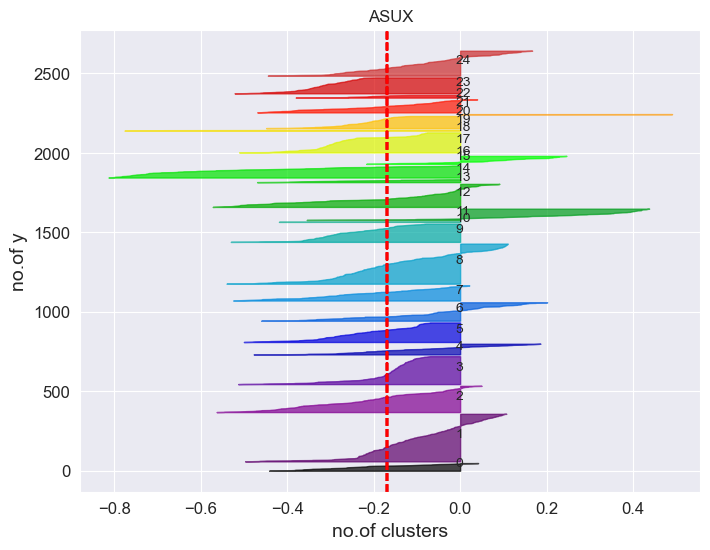

the k.No  26
the k.No  26
the k.No  26
the k.No  26
the k.No  26
the k.No  26
the k.No  26
the k.No  26
the k.No  26
the k.No  26
the k.No  26
the k.No  26
the k.No  26
the k.No  26
the k.No  26
the k.No  26
the k.No  26
the k.No  26
the k.No  26
the k.No  26
the k.No  26
the k.No  26
the k.No  26
the k.No  26
the k.No  26
the k.No  26


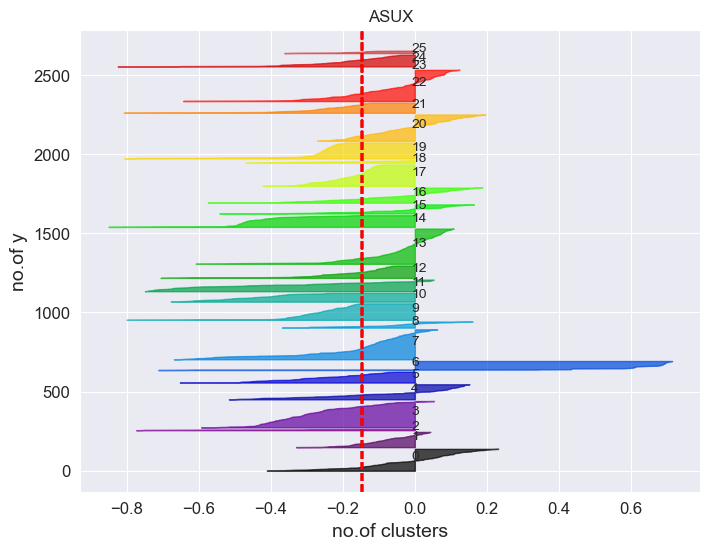

the k.No  27
the k.No  27
the k.No  27
the k.No  27
the k.No  27
the k.No  27
the k.No  27
the k.No  27
the k.No  27
the k.No  27
the k.No  27
the k.No  27
the k.No  27
the k.No  27
the k.No  27
the k.No  27
the k.No  27
the k.No  27
the k.No  27
the k.No  27
the k.No  27
the k.No  27
the k.No  27
the k.No  27
the k.No  27
the k.No  27
the k.No  27


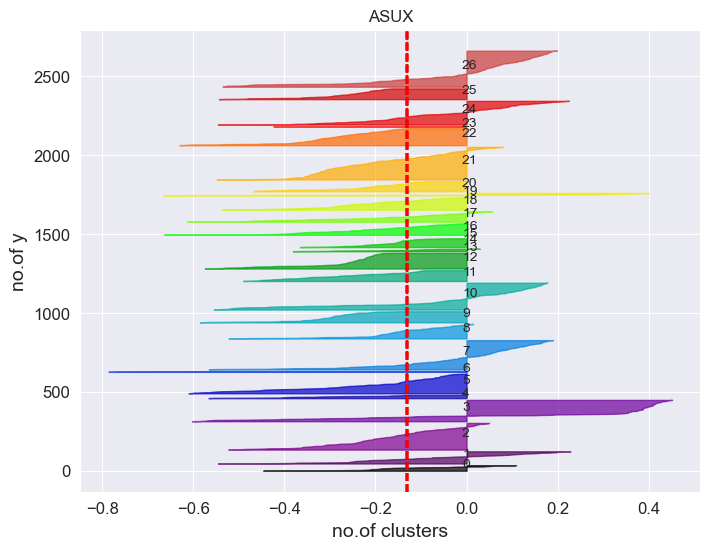

the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28
the k.No  28


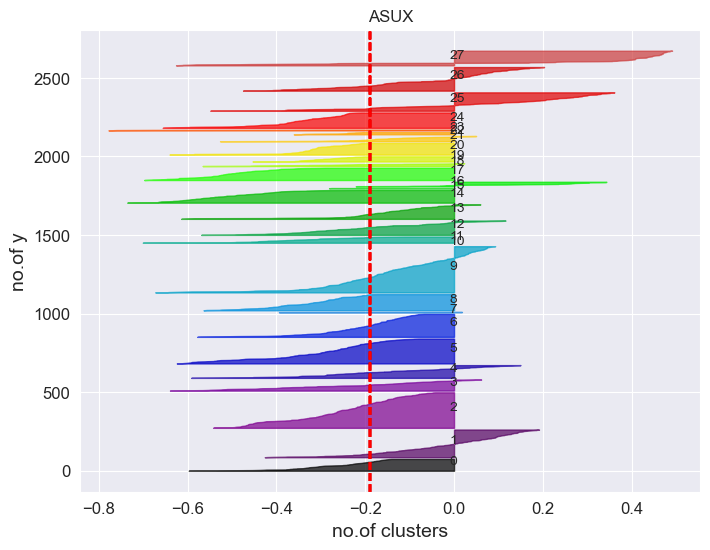

the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29
the k.No  29


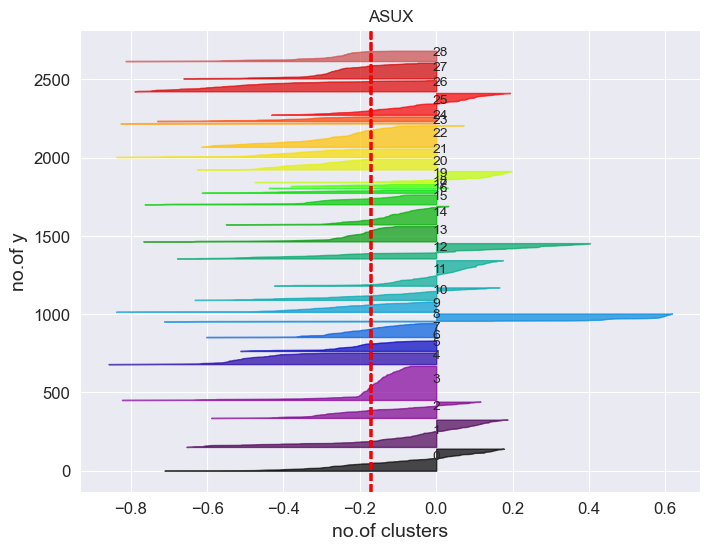

the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30
the k.No  30


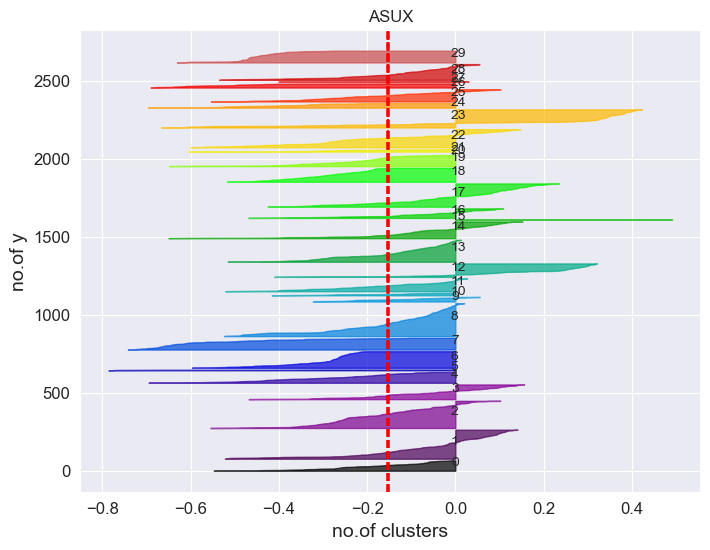

the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31
the k.No  31


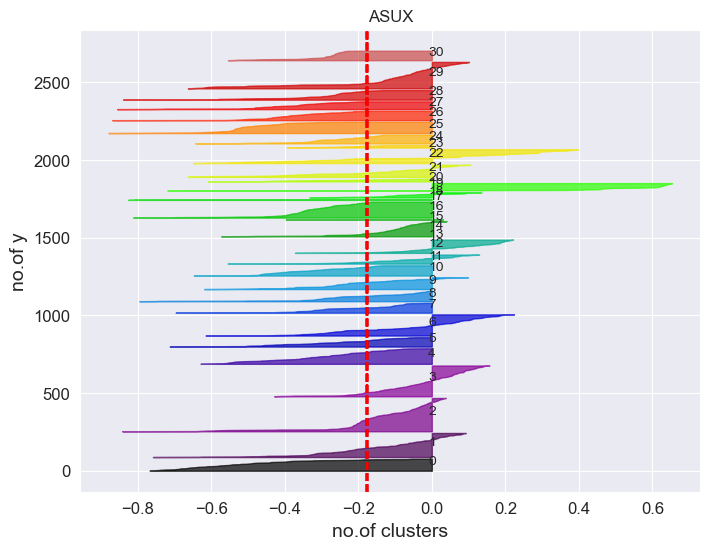

the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32
the k.No  32


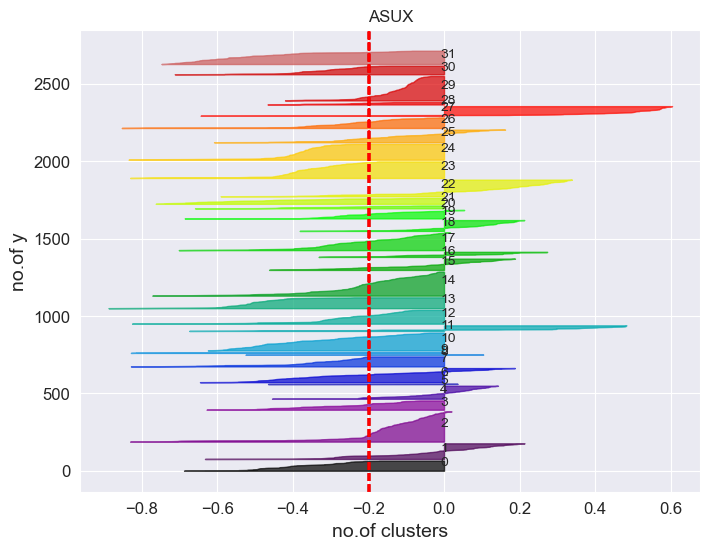

the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33
the k.No  33


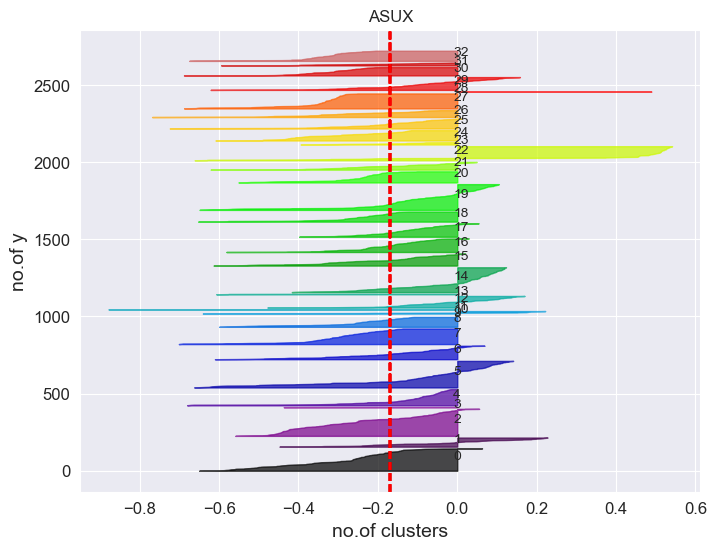

the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34
the k.No  34


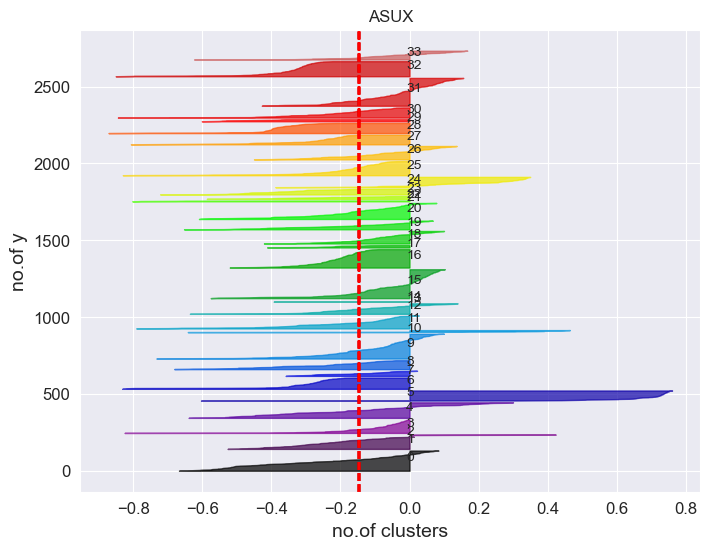

the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35
the k.No  35


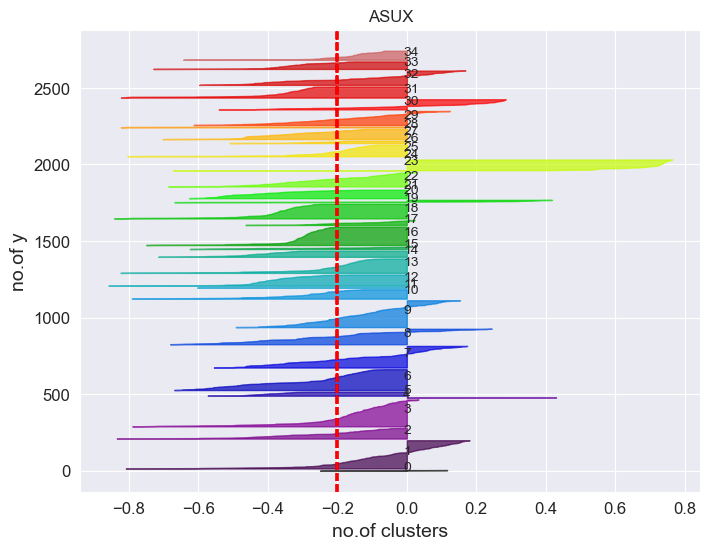

the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36
the k.No  36


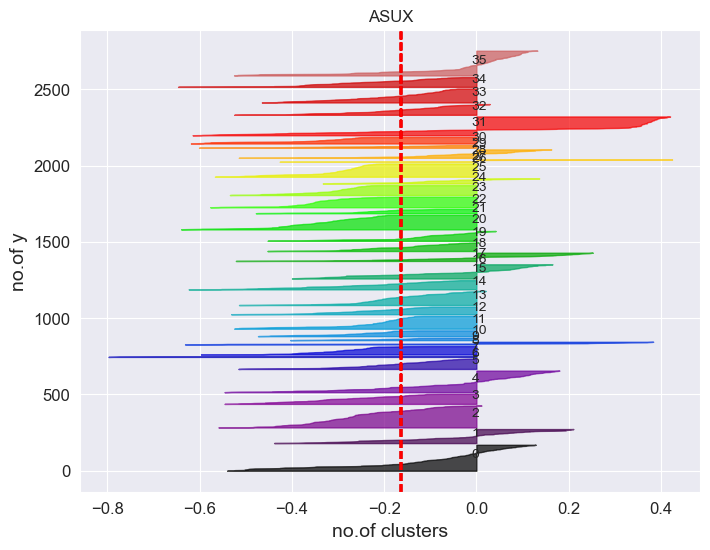

the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37
the k.No  37


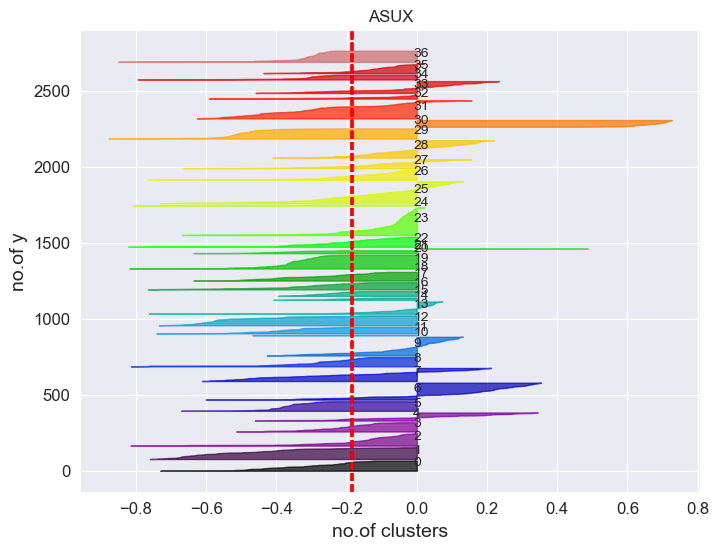

the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38
the k.No  38


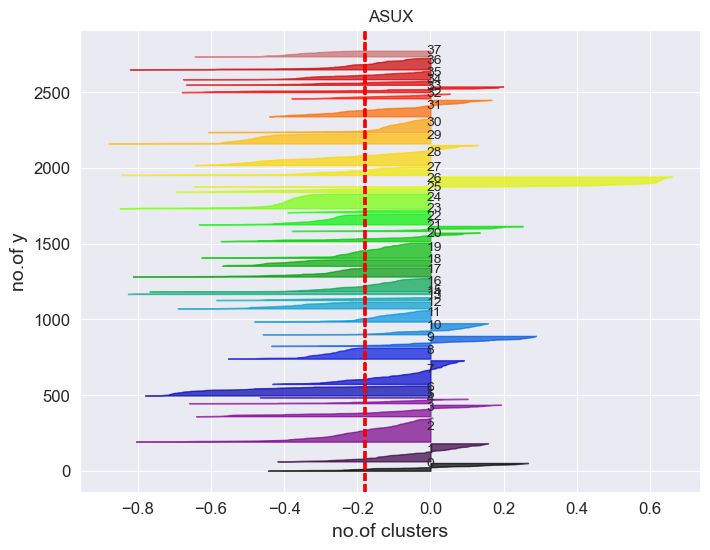

the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39
the k.No  39


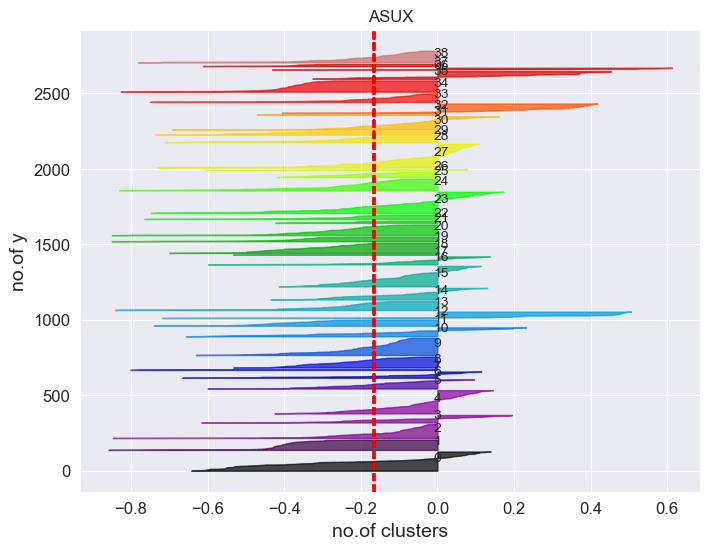

In [30]:
std = StandardScaler()
train_k = std.fit_transform(train_n)


for k in range(2,40):
    
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_k)  # Fit the KMeans model
    cluster_labels = kmeans.predict(train_k)  # Predict the cluster labels for X_train
    train_dfx['cluster_labels'] = cluster_labels
    tylor = train_dfx.select_dtypes(include=[np.number])
    sil_avg = silhouette_score(tylor  , cluster_labels)
    y_lower = 0
    fig, ax = plt.subplots(figsize=(8, 6))
    
    for i in range(k) :
        
        
        sil = silhouette_samples(tylor  , cluster_labels)
        silidx = sil[cluster_labels == i]
        silidx.sort()
        y_upper = len(silidx) + y_lower
        
        ax.axvline(x=sil_avg, color="red", linestyle="--")
        color = plt.cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower,y_upper) , 0 , silidx , facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.01, y_lower + 0.5 * len(silidx), str(i))
        print('the k.No ', k)
        
        y_lower = y_upper + 10
        
    ax.set_xlabel("no.of clusters")
    ax.set_ylabel("no.of y")
    ax.set_title(f"ASUX")
    plt.show()

In [31]:
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(train_k)  # Fit the KMeans model
cluster_labels = kmeans.predict(train_k)  # Predict the cluster labels for X_train
train_dfx['cluster_labels'] = cluster_labels

In [32]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

# Check the skew of all numerical features
skewed_feats = train_dfx[numerical_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



Skew
MiscVal        24.325074
PoolArea       20.763509
LowQualFinSF   14.769617
3SsnPorch      12.528497
KitchenAbvGr    4.259827
BsmtFinSF2      4.176197
EnclosedPorch   4.087080
BsmtHalfBath    3.864653
LotArea         3.811288
ScreenPorch     3.785538
MasVnrArea      2.753844
OpenPorchSF     2.541499
WoodDeckSF      1.928734
1stFlrSF        1.384921
BsmtFinSF1      1.042735
TotalSF         1.032090
GrLivArea       0.977442
2ndFlrSF        0.866372
BsmtUnfSF       0.844198
HalfBath        0.769336
Fireplaces      0.760709
TotRmsAbvGrd    0.758797
TotalBsmtSF     0.668255
BsmtFullBath    0.642844
LotFrontage     0.596195
OverallCond     0.572806
BedroomAbvGr    0.315256
GarageArea      0.305761
FullBath        0.187020
OverallQual     0.176090
GarageCars     -0.060045
YearRemodAdd   -0.433047
YearBuilt      -0.531859

In [33]:

def boxcox_transform(X, lam):
    X_transformed = X.copy()
    numeric_feats = X_transformed.dtypes[X_transformed.dtypes != "object"].index
    skewed_feats = X_transformed[numeric_feats].apply(lambda x: skew(x.dropna()))
    skewed_feats = skewed_feats[skewed_feats > 0.75]
    skewed_features = skewed_feats.index
    
    for feat in skewed_features:
        min_val = X_transformed[feat].min()
        if min_val <= 0:
            X_transformed[feat] += abs(min_val) + 1
        X_transformed[feat] = boxcox1p(X_transformed[feat], lam)
        
    X_transformed = pd.get_dummies(X_transformed)      
 
    return X_transformed


def evaluate_lambda(lam, X, y):
    X_encoded = boxcox_transform(X, lam)    
    lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=42))
    cv = KFold(n_splits=5, shuffle=True, random_state=42).get_n_splits(train.values)
    scores = cross_val_score(lasso, X_encoded.values, y, cv=cv, scoring='neg_mean_squared_error')
    return np.sqrt(-scores.mean())

train = train_dfx[:ntrain]

lambdas = np.arange(0, 2 , 0.01)
scores = []

for lam in lambdas:
    score = evaluate_lambda(lam, train, y_train)
    scores.append(score)

best_lam = lambdas[np.argmin(scores)]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.323e-03, tolerance: 7.736e-03
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.280e-03, tolerance: 7.736e-03
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.034e-02, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.751e-02, tolerance: 7.736e-03
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.289e-02, tolerance: 7.736e-03
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.835e-02, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.052e-01, tolerance: 7.736e-03
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.370e-01, tolerance: 8.207e-03
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.266e-01, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.774e-01, tolerance: 7.794e-03
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.760e-01, tolerance: 8.247e-03
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.031e-02, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.725e-01, tolerance: 8.271e-03
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.867e-02, tolerance: 8.247e-03
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.911e-01, toleranc

In [34]:
skewness = skewness[abs(skewness) > 0.9]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.48
for feat in skewed_features:
    train_dfx[feat] = boxcox1p(train_dfx[feat], lam)

There are 33 skewed numerical features to Box Cox transform


In [35]:
train_dfx = pd.get_dummies(train_dfx,dtype='int8')
train_dfy = y_train
train = train_dfx[:ntrain]
test = train_dfx[ntrain:]

## Lasso, ElasticNet,KernelRidge,GradientBoostingRegressor

In [36]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)



# SVR

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(train, train_dfy, test_size=0.2, random_state=42)

full_pipeline = Pipeline([
    ('std', RobustScaler()),
    ('svr', SVR())
])

Parms = {
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__C': [0.01, 0.1, 1, 10, 100],
    'svr__epsilon': [0.0001, 0.001, 0.01, 0.1, 1],
    'svr__gamma': [0.0001, 0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(
    full_pipeline, Parms, cv=5, n_jobs=-1, scoring="neg_mean_squared_error", verbose=3
)

grid_search.fit(x_train, y_train)

pred_train = grid_search.predict(x_train)
mse = mean_squared_error(y_train, pred_train)
rmse_train = np.sqrt(mse)

pred_test = grid_search.predict(x_test)
mse = mean_squared_error(y_test, pred_test)
rmse_test = np.sqrt(mse)

best_rmse = -grid_search.best_score_

print('Train set RMSE:', rmse_train)
print('Test set RMSE:', rmse_test)
print('best_rmse:', best_rmse)

cleaned_best_params = {key.replace("svr__", ""): value for key, value in grid_search.best_params_.items()}
print("Cleaned best parameters:\n", cleaned_best_params)

SVR_M = SVR(**cleaned_best_params)

Fitting 5 folds for each of 375 candidates, totalling 1875 fits


In [ ]:
from scipy.stats import loguniform 

x_train ,x_test ,y_train , y_test = train_test_split(train,train_dfy,test_size=0.2,random_state=42)

from sklearn.metrics import make_scorer

def rmse_scorer(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return -rmse  # Use negative value since greater is better for scorers

rmse_scoring = make_scorer(rmse_scorer)


full_pipeline = Pipeline([
    ('std',RobustScaler()),
    ('svr' , SVR())
])


Parms = {
    'svr__kernel': [ 'linear', 'rbf' ,'poly'],
    'svr__degree': randint(1,20),
    'svr__C': loguniform(0.01, 100),
    'svr__epsilon': reciprocal(0.0001, 1),
    'svr__gamma': reciprocal(0.001, 1)
}

rnd_search = RandomizedSearchCV(
    full_pipeline, Parms, n_iter= 80 , cv=5, random_state=42, n_jobs=-1, scoring="neg_mean_squared_error", verbose=3,
)

rndx = rnd_search.fit(x_train, y_train)


pred_train = rndx.predict(x_train)
mse = mean_squared_error(y_train, pred_train)
rmse_train = np.sqrt(mse)

pred_test = rndx.predict(x_test)
mse = mean_squared_error(y_test, pred_test)
rmse_test = np.sqrt(mse)


best_rmse = -rnd_search.best_score_

print('Train set RMSE:', rmse_train)
print('Test set RMSE:', rmse_test)
print('best_rmse:', best_rmse) 

cleaned_best_params = {key.replace("svr__", ""): value for key, value in rndx.best_params_.items()}
print("Cleaned best parameters:\n", cleaned_best_params)

SVR_M = SVR(**cleaned_best_params)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [100]:
score = rmsle_cv(SVR_M, train)
print("\nSVR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


SVR score: 0.1073 (0.0094)



#  RANDOMFORESTREGRESSOR (RFR)

In [96]:
full_pipeline = Pipeline([
    ('RFR', RandomForestRegressor(random_state=42,n_jobs=-1))
])


prams = {
    
    
    "RFR__max_features": uniform(0.1, 0.9),
    "RFR__n_estimators": randint(1000, 4000),
    "RFR__max_depth": randint(10,500),
    "RFR__min_samples_split":randint(2,20)
 }
     

rnd_search = RandomizedSearchCV(full_pipeline , prams , n_iter=50, cv=3 , random_state=42 , n_jobs=-1)  

rndx_rtree = rnd_search.fit(x_train, y_train)
pred_train = rndx_rtree.predict(x_train)
mse = mean_squared_error( y_train , pred_train)
rmse = np.sqrt(mse)

print('the result of the train set :', rmse)

predTREE_test = rndx_rtree.predict(x_test)
msei = mean_squared_error(y_test , predTREE_test)
rmsei = np.sqrt(msei)

print('the result of the test set :', rmsei)

cleaned_best_params = {key.replace("RFR__", ""): value for key, value in rndx_rtree.best_params_.items()}
print("Cleaned best parameters:\n", cleaned_best_params)

RFR = RandomForestRegressor(**cleaned_best_params)


the result of the train set : 0.04527716088823113
the result of the test set : 0.13685699631520376
Cleaned best parameters:
 {'max_depth': 357, 'max_features': 0.42066805426927745, 'min_samples_split': 2, 'n_estimators': 2408}


# IMPLEMENT ADABOOST AND RFRTREE IN A STACKING CLASSIFIER 

In [43]:
stk_reg = StackingRegressor(estimators=[('rndx_svr', rndx.best_estimator_),
                                       ('rndx_rtree',rndx_rtree.best_estimator_),
                                       ('ESNet', ENet),
                                        ('KRR',KRR),
                                        ('GBoost',GBoost),
                                        ('lgb',lgb)
                                       ],
                           final_estimator= lasso ,
                           cv=5)


In [38]:
n_folds = 5

def rmsle_cv(model, x):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x)
    rmse= np.sqrt(-cross_val_score(model, x, train_dfy, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

score = rmsle_cv(lasso, train)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet, train)
print("\nENet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(lgb, train)
print("\nLGBMRegressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR, train)
print("\nKRR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost, train)
print("\nGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(SVR_M, train)
print("\nSVR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(RFR, train)
print("\nRandom Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(stk_reg, train)
print("\nStackingRegressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))




Lasso score: 0.1051 (0.0076)


ENet score: 0.1052 (0.0073)



NameError: name 'lgb' is not defined

In [97]:
kf = KFold(n_splits=12, random_state=42, shuffle=True)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X= train ):
    rmse = np.sqrt(-cross_val_score(model, X, train_dfy, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [52]:
import lightgbm as lgb
import xgboost as xgb


lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)


In [ ]:
X = train
train_labels = train_dfy

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(train_labels))

print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, train_labels)

print('xgboost')
xgb_model_full_data = xgboost.fit(X, train_labels)

print('Svr')
svr_model_full_data = svr.fit(X, train_labels)

print('Ridge')
ridge_model_full_data = ridge.fit(X, train_labels)

print('RandomForest')
rf_model_full_data = rf.fit(X, train_labels)

print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, train_labels)



def blended_predictions(X):
    return ((0.1 * ridge_model_full_data.predict(X)) + \
            (0.2 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.1 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.05 * rf_model_full_data.predict(X)) + \
            (0.35 * stack_gen_model.predict(np.array(X))))


In [38]:
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

std_scaler=StandardScaler()
rbst_scaler=RobustScaler()

X_std=std_scaler.fit_transform(train)

X_train,X_test,y_train,y_test=train_test_split(X_std,train_dfy,test_size=0.002,random_state=52)
print('X_train Shape :',X_train.shape)
print('X_test Shape :',X_test.shape)
print('y_train Shape :',y_train.shape)
print('y_test Shape :',y_test.shape)

lgb_regressor=lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.035, n_estimators=2177, max_bin=50, bagging_fraction=0.65,bagging_freq=5, bagging_seed=7, 
                                feature_fraction=0.201, feature_fraction_seed=7,n_jobs=-1)
lgb_regressor.fit(X_train, y_train)
y_head=lgb_regressor.predict(X_test)
print('-'*10+'LGBM'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

X_train Shape : (943, 328)
X_test Shape : (2, 328)
y_train Shape : (943,)
y_test Shape : (2,)
[LightGBM] [Warning] feature_fraction is set=0.201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.201
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
----------LGBM----------
R square Accuracy:  -1.2065160063564773
Mean Absolute Error Accuracy:  0.0226359241473979
Mean Squared Error Accuracy:  0.0005778303192869057


In [94]:
lgb = make_pipeline(StandardScaler(),lgb_regressor)